In [11]:
import matplotlib.pyplot as plt
import yfinance as yf;
import ipywidgets as widgets

In [12]:
op=widgets.RadioButtons(
    options=["Calls","Puts"],
    description='Type:',
    disabled=False
)

tik=widgets.Text(
    value='TSLA',
    placeholder='Type the stock ticker',
    description='Ticker:',
    disabled=False   
)
widgets.VBox([tik,op])

In [13]:
stock = yf.Ticker(tik.value)
maturities=stock.options
lengths=[] # Useful for debug
options_l=[]

if op.value=="Calls": # Calls
    for dat in maturities:
        opt =stock.option_chain(date=dat)
        lengths.append(len(opt.calls))
        options_l.append(opt.calls)
elif op.value=="Puts": # Puts
    for dat in maturities:
        opt =stock.option_chain(date=dat)
        lengths.append(len(opt.puts))
        options_l.append(opt.puts)

C:\Users\volpi\AppData\Local\Temp\ipykernel_18916\3197759562.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(maturities);


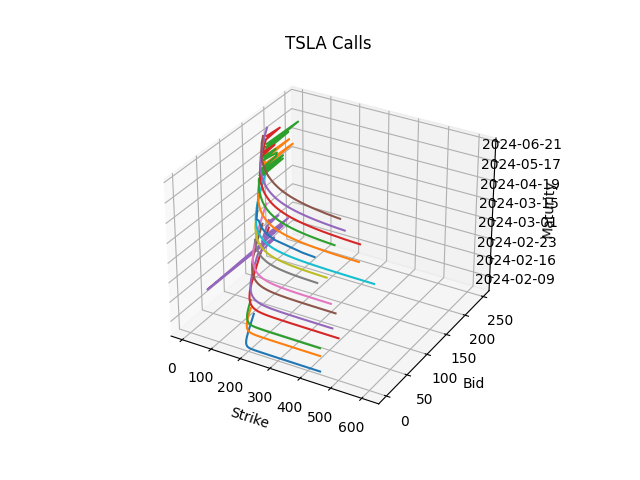

In [14]:
%matplotlib widget
#fig = plt.figure(dpi=720)
ax = plt.axes(projection='3d')
lines=[]
z=0
for ca in options_l:
    if len(ca)<100: # We don't consider maturities with extreme strikes
        lin=ax.plot3D(xs=ca['strike'], ys=ca['bid'], zs=z)
    z+=1

ax.set_title(f"{tik.value} {op.value}")
ax.set_xlabel('Strike')
ax.set_ylabel('Bid')
ax.set_zlabel('Maturity')
ax.set_zticklabels(maturities);